In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
kw_path = "data/keywords.txt"

In [7]:
def load_keywords(path):
    res = []
    with open(path) as f:
        text = f.read().strip()
        tags_str = text.split(",")
        res = map(lambda t: [_.strip() for _ in t.split(">")], tags_str)
        res = filter(lambda x: len(x) > 0, res)
        res = list(res)
    return res

In [8]:
KEYWORDS = load_keywords(kw_path)

In [9]:
len(KEYWORDS), len(set([kw for kws in KEYWORDS for kw in kws]))

(1654, 1320)

# Build Tree

Here we visualize the hierarchical structure of the keywords.

In some of the references, I found that people are building N classifiers, at each levels in the tree.

In [79]:
from collections import Counter, defaultdict

In [80]:
from loguru import logger

In [81]:
from dataclasses import dataclass, field

In [82]:
from typing import List

In [83]:
def build_trie(lst):
    tree = lambda: defaultdict(tree)
    d = tree()    
    for x in lst:
        curr = d
        for item in x:
             curr = curr[item]
    return d

In [84]:
build_trie(KEYWORDS)["earth science"]["solid earth"].keys()

dict_keys(['rocks/minerals', 'rocks/minerals/crystals', 'geomagnetism', 'geomorphic landforms/processes', 'tectonics', 'geomorphology', 'geodetics', 'gravity/gravitational field', 'geothermal dynamics', 'geodetics/gravity', 'seismology', 'earth gases/liquids', 'geochemistry'])

In [85]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [86]:
def build_tree(keywords):
    G = nx.Graph()
    for kws in keywords:
        for curr, nxt in zip(kws, kws[1:]):
            G.add_edge(curr, nxt)
    return G

In [87]:
G = build_tree(KEYWORDS[:250])

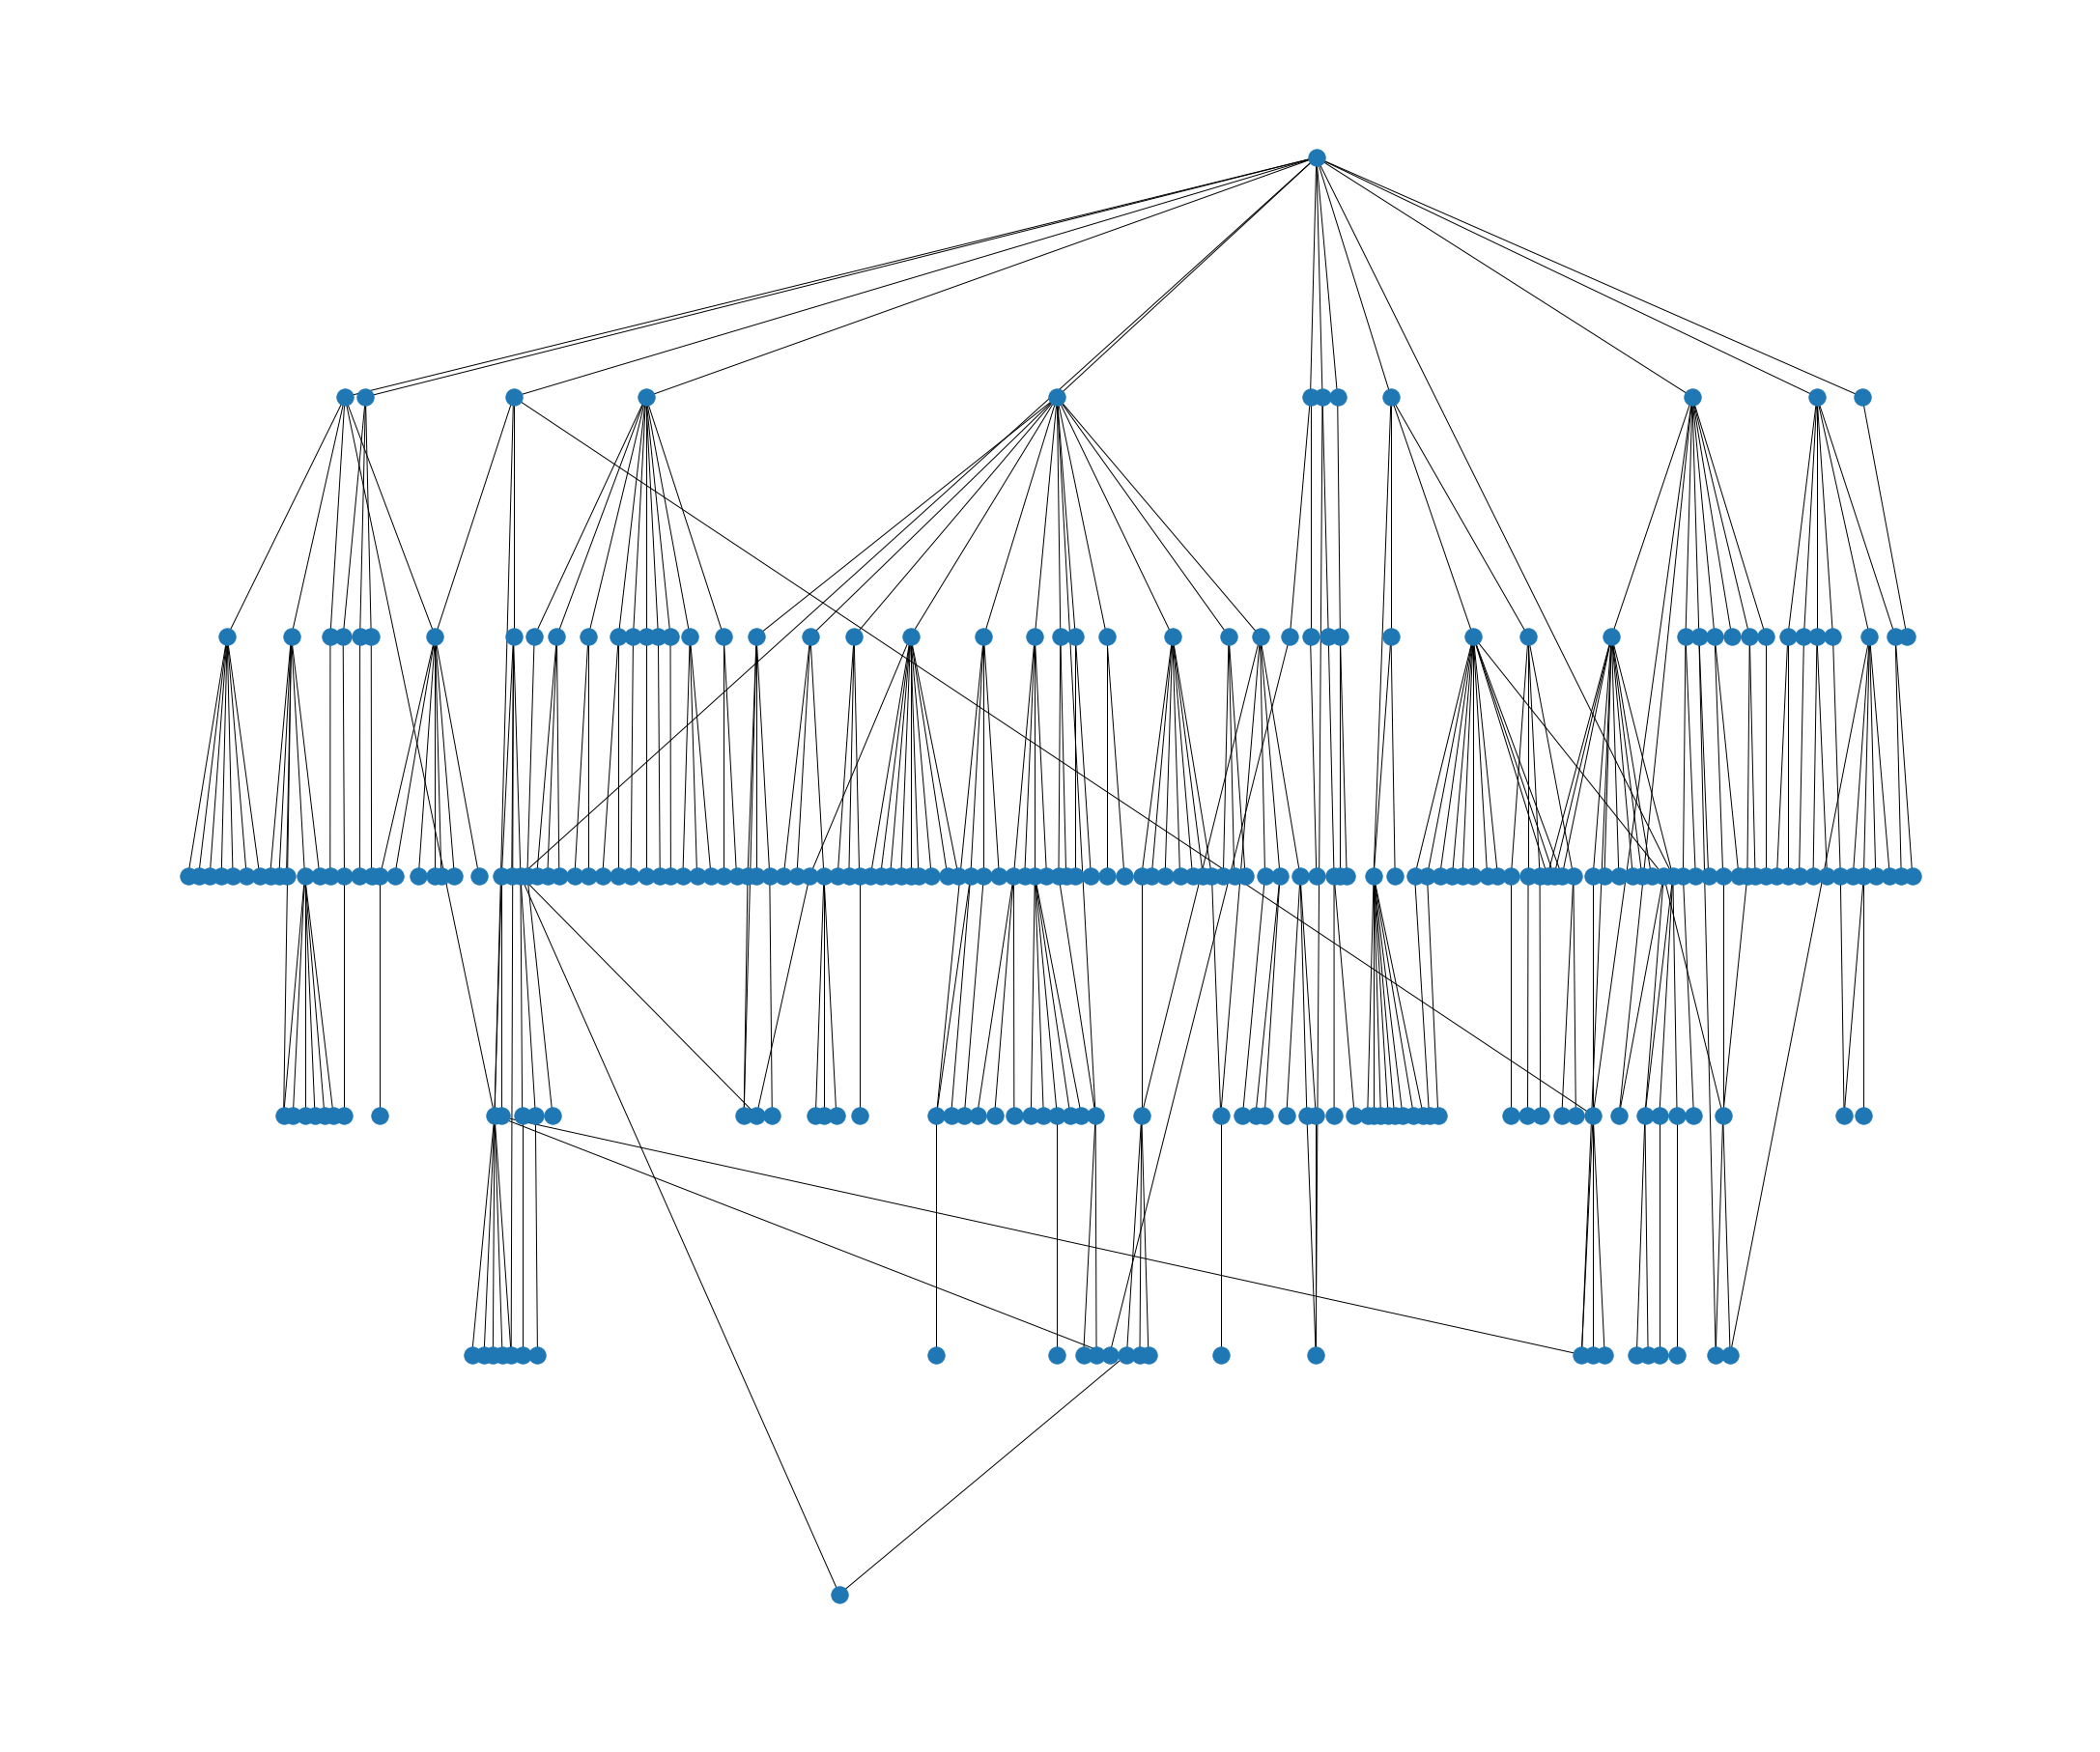

In [88]:
plt.figure(figsize=(30, 25))
# nx.draw(G)

# pos = graphviz_layout(G, prog="twopi")
pos = graphviz_layout(G, prog="dot")
nx.draw(G, pos)
plt.show()